# Проект UNICEF

### Влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике

__29-31.03.2021__

Дмитрий Кузнецов

In [3394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import warnings; warnings.simplefilter('ignore')

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

students = pd.read_csv('stud_math.csv')

# To rename many or all columns:
# students.columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 
#                     'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 
#                     'traveltime', 'studytime', 'failures', 'schoolsup', 
#                     'famsup', 'paid', 'activities', 'nursery', 'studytime', 
#                     'higher', 'internet', 'romantic', 'famrel', 'freetime', 
#                     'goout', 'health', 'absences', 'score']

# Rename 'studytime, granular' to just 'granular' for convenience
# Rename 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob' to small letters 
students.rename(columns = {'studytime, granular':'granular',
                           'Pstatus':'pstatus',
                           'Medu':'medu', 'Fedu':'fedu', 
                           'Mjob':'mjob', 'Fjob':'fjob'}, inplace = True)

display(students)


# Define the function to alalyze an object type column.

# Substitutes:
# - empty strings or stringes of spaces to None

# Prints:
# - number of blanks/NaN and % of all;
# - for each unique value: count and % of all;
# - total number of rows.

# Returns:
# - column;
# - total number of rows in column;
# - DataFrame containing counts of unique values;
# - a.m. DataFrame length, e.g. number of unique values.

def column_analysis(col):
    
    students[col] = students[col].astype(str).apply(lambda x: None if pd.isna(x) 
                                                    else None if x == 'nan' 
                                                    else x)
    total_rows = len(students[col])
    df = pd.DataFrame(students[col].value_counts())
    number_of_unigue_values = len(df)
    number_of_none = students[col].isna().sum()
    
    print("NaN", ': ', number_of_none, ' (', 
          round(number_of_none/total_rows*100, 1), '%)', sep='')
    
    # Iteration by rows:
    # http://espressocode.top/different-ways-to-iterate-over-rows-in-pandas-dataframe/
    for row in df.index:
        print(row, ': ', int(df.loc[row]), ' (', 
              round(int(df.loc[row])/total_rows*100, 1), '%)', sep='')
    
    print("Всего строк:", total_rows)
    
    if df[col].sum() + number_of_none != total_rows:
        print('Something is rotten in the state of Denmark ...')
    
    return (col, total_rows, df, total_rows)

# ЭТАЛОН-исходник от Sergey Meshcheryakov (meshcheryakovsvru@yandex.ru)

# Option 1
# def nan_to_values(column):
#     np.random.seed(1)
#     nan_index_list = stud[pd.isna(stud[column])].index
#     for index in nan_index_list:
#         stud.iat[index, stud.columns.get_loc(column)] = np.random.choice(['yes','no'],1)[0]
# stud = pd.read_csv('stud_math.xls')
# display(stud.romantic.value_counts(dropna=False))
# nan_to_values('romantic')
# display(stud.romantic.value_counts(dropna=False))

# Option 2
# def nan_to_values(column, change_list):
#     np.random.seed(1)
#     stud[column] = stud[column].apply(lambda x: np.random.choice(change_list,1)[0] 
#                                   if pd.isna(x) else x)
# change_list = ['yes','no']
# nan_to_values('romantic',change_list)

# Define function fill_nan_randomly():
# fills nans randomly with values from change_options_list

def fill_nan_randomly(col, change_options_list):
    np.random.seed(1) # initialize the random number generator
    students[col] = students[col].apply(lambda x: 
                                        np.random.choice(change_options_list, 1)[0]
                                        if pd.isna(x) else x)

    
# Function definition from the SkillFactory course - Student test

def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:10]
#     cols = students.loc[:, column]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        print(comb)
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'], 
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
        <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


Итак, 395 строк и 30 столбцов-колонок. Сразу видим расхождение с описанием от авторов - у них в перечне 29 колонок. В реальном датасете есть "недокументированная" колонка __studytime, granular__. 

In [3395]:
#--------1---------2---------3---------4---------5---------6---------7---------8

# To rename many or all columns:
# students.columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 
#                     'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 
#                     'traveltime', 'studytime', 'failures', 'schoolsup', 
#                     'famsup', 'paid', 'activities', 'nursery', 'studytime', 
#                     'higher', 'internet', 'romantic', 'famrel', 'freetime', 
#                     'goout', 'health', 'absences', 'score']

# Rename 'studytime, granular' to just 'granular' for convenience
# Rename 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob' to small letters 
# students.rename(columns = {'studytime, granular':'granular',
#                            'Pstatus':'pstatus',
#                            'Medu':'medu', 'Fedu':'fedu', 
#                            'Mjob':'mjob', 'Fjob':'fjob'}, inplace = True)
# display(students)

In [3396]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   pstatus     350 non-null    object 
 6   medu        392 non-null    float64
 7   fedu        371 non-null    float64
 8   mjob        376 non-null    object 
 9   fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

Раскладка по типам колонок:
- object - 17
- int64 - 1 - [age]
- float64 - 12

__Всего 30__

Рассмотрим каждую колонку по отдельности.

### __1. "school", строковая__

In [3397]:
pd.DataFrame(students.school.value_counts())

,school
GP,349
MS,46


In [3398]:
# Another option:

students.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [3399]:
# Use our column_analysis() function:

school = column_analysis('school')

NaN: 0 (0.0%)
GP: 349 (88.4%)
MS: 46 (11.6%)
Всего строк: 395


Видим всего две школы, пропусков нет.

### __2. "sex", строковая__

In [3400]:
sex = column_analysis('sex')

NaN: 0 (0.0%)
F: 208 (52.7%)
M: 187 (47.3%)
Всего строк: 395


Видим всего два пола, пропусков нет.

### __3. "age", числовая - int64__

In [3401]:
age = column_analysis('age')

NaN: 0 (0.0%)
16: 104 (26.3%)
17: 98 (24.8%)
18: 82 (20.8%)
15: 82 (20.8%)
19: 24 (6.1%)
20: 3 (0.8%)
21: 1 (0.3%)
22: 1 (0.3%)
Всего строк: 395


In [3402]:
# NON pretty part of the code
# The point is that column_analysis() functions 
# converts all fields to strubg type.
# We now convert is back to integer.

students['age'] = students['age'].apply(lambda x: int(x))

Пропусков нет. Смотрим гистограмму.

<AxesSubplot:xlabel='age', ylabel='count'>

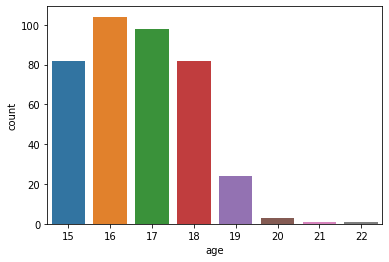

In [3403]:
sns.countplot(x = 'age', data = students)

Видно, что 366 из 395 студентов имеют возраст от 15 до 18 включительно.

Еще 24 студента в возрасте 19 лет.

Студентов возраста 20, 21 и 22 года - всего 5 человек, то есть чуть более 1% датасета.

Поэтому предлагаю считать "возрастных" студентов старше 19 лет выбросами и удалить из рассмотрения.

In [3404]:
students = students.loc[students.age <= 19]

Осталось 390 строк и 30 столбцов.

__30.03.2021 12:00__

### __4. "address", строковая__

In [3405]:
address = column_analysis('address')

NaN: 16 (4.1%)
U: 292 (74.9%)
R: 82 (21.0%)
Всего строк: 390


Пропусков (nan) - 4.1%.

Можно удалить эти 14 строк с пропусками, а можно рандомно заполнить либо U, либо R.

##### ЗАМЕЧАНИЕ: Можно написать функцию, которая будет заменять пропуски либо на U, либо на R, но не просто рандомно, а пропорционально, в соотношении распределения U/R, то есть рандомно и в пропорции 292/82. В силу временнЫх ограничений, ограничимся простым случайным заполнением.

In [3406]:
change_list = ['U','R']
fill_nan_randomly('address', change_list) # Fill NaN Randomly

In [3407]:
address = column_analysis('address')

NaN: 0 (0.0%)
U: 298 (76.4%)
R: 92 (23.6%)
Всего строк: 390


Заменив пропуски, получили датасет с 390 строками.

Видно, что 298 (76.4%) учеников живет в городах (Urban) и 92 (23.6%) за городом (Rural).

### __5. "famsize", строковая — размер семьи ('LE3' <= 3, 'GT3' >3)__

In [3408]:
famsize = column_analysis('famsize')

NaN: 27 (6.9%)
GT3: 257 (65.9%)
LE3: 106 (27.2%)
Всего строк: 390


Заменяем 27 пропусков.

In [3409]:
change_list = ['GT3','LE3']
fill_nan_randomly('famsize', change_list)  # Fill NaN Randomly

In [3410]:
famsize = column_analysis('famsize')

NaN: 0 (0.0%)
GT3: 271 (69.5%)
LE3: 119 (30.5%)
Всего строк: 390


Видно, что у 271 (69.5%) учеников размер семьи более 3 человек (GT3).

119 (30.5%) учеников имеют семью из 3 и менее человек (LE3).

### __6. "pstatus", строковая — статус совместного жилья родителей__
('T' - живут вместе 'A' - раздельно)

In [3411]:
pstatus = column_analysis('pstatus')

NaN: 45 (11.5%)
T: 311 (79.7%)
A: 34 (8.7%)
Всего строк: 390


Пропусков 45, почти 12%, заменим случайным образом.

In [3412]:
change_list = ['T','A']
fill_nan_randomly('pstatus', change_list)  # Fill NaN Randomly

In [3413]:
pstatus = column_analysis('pstatus')

NaN: 0 (0.0%)
T: 332 (85.1%)
A: 58 (14.9%)
Всего строк: 390


У 332 (85.1%) учеников родители живут вместе, у 58 (14.9%) раздельно.

### __7. "medu", float — образование матери__
(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [3414]:
medu = column_analysis('medu')

NaN: 3 (0.8%)
4.0: 130 (33.3%)
2.0: 101 (25.9%)
3.0: 95 (24.4%)
1.0: 58 (14.9%)
0.0: 3 (0.8%)
Всего строк: 390


In [3415]:
change_list = ['1.0','2.0', '3.0','4.0']
fill_nan_randomly('medu', change_list)  # Fill NaN Randomly

In [3416]:
students = students.loc[students.medu != '0.0'] # Delete 3 zero education level
students

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,LE3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,A,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,course,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,NaN,2.0,1.0,no,no,no,yes,yes,-6.0,yes,NaN,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [3417]:
medu = column_analysis('medu')

NaN: 0 (0.0%)
4.0: 131 (33.9%)
2.0: 102 (26.4%)
3.0: 95 (24.5%)
1.0: 59 (15.2%)
Всего строк: 387


In [3418]:
# Change medu column to integer

students['medu'] = students['medu'].apply(lambda x: int(float(x)))
students

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,LE3,A,4,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,A,1,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,F,18,U,LE3,T,3,1.0,teacher,services,course,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0
389,MS,F,18,U,GT3,T,1,1.0,other,other,course,mother,NaN,2.0,1.0,no,no,no,yes,yes,-6.0,yes,NaN,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,U,LE3,T,3,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
393,MS,M,18,R,LE3,T,3,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


count    387.000000
mean       2.770026
std        1.077961
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

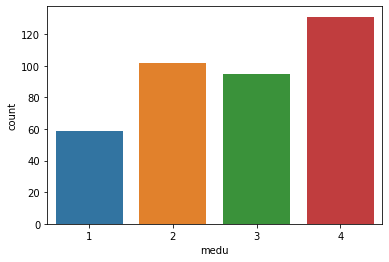

In [3419]:
sns.countplot(x = 'medu', data = students)
students.medu.describe()

In [3420]:
medu = column_analysis('medu')
students['medu'] = students['medu'].apply(lambda x: int(float(x)))

NaN: 0 (0.0%)
4: 131 (33.9%)
2: 102 (26.4%)
3: 95 (24.5%)
1: 59 (15.2%)
Всего строк: 387


Матери учеников имеют следующее образование:

- 131 (33.9%) - высшее;
- 102 (26.4%) - 5-9 классов;
- 95 (24.5%) - среднее специальное или 11 классов;
- 59 (15.2%) - 4 класса.

Наиболее распространенное - высшее - примерно 1/3, далее примерно по 1/4 5-9 классов и среднее специальное или 11 классов, наименее частое - 4 класса, около 15%.

### __8. "fedu", float — образование отца__
(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [3421]:
fedu = column_analysis('fedu')

NaN: 24 (6.2%)
2.0: 101 (26.1%)
3.0: 96 (24.8%)
4.0: 88 (22.7%)
1.0: 75 (19.4%)
0.0: 2 (0.5%)
40.0: 1 (0.3%)
Всего строк: 387


Видно, что значение 40 - явная ошибка. Можно удалить, а можно исправить на 4, предположив, что это опечатка.

Заменим значение 40 на 4.

Заменим также 21 пропуск.

Удалим два случая с fedu = 0.0

In [3422]:
# Delete 1 case with fedu = 0.0 as they are less than 1%
students = students.loc[students.fedu != '0.0'] # Delete zero education level

change_list = ['1.0','2.0', '3.0','4.0']
fill_nan_randomly('fedu', change_list)  # Fill NaN Randomly

# Change column from string to integer
students['fedu'] = students['fedu'].apply(lambda x: int(float(x)))

# Change 40 to 4
students.fedu = students.fedu.replace(40, 4)
students

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,LE3,A,4,4,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,A,1,1,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4,2,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0
389,MS,F,18,U,GT3,T,1,1,other,other,course,mother,NaN,2.0,1.0,no,no,no,yes,yes,-6.0,yes,NaN,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


count    385.000000
mean       2.532468
std        1.082344
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: fedu, dtype: float64

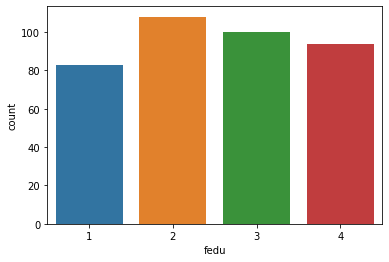

In [3423]:
sns.countplot(x = 'fedu', data = students)
students.fedu.describe()

In [3424]:
fedu = column_analysis('fedu')
students['fedu'] = students['fedu'].apply(lambda x: int(float(x)))

NaN: 0 (0.0%)
2: 108 (28.1%)
3: 100 (26.0%)
4: 94 (24.4%)
1: 83 (21.6%)
Всего строк: 385


Отцы учеников имеют следующее образование:

- 108 (28.1%) - 5-9 классы;
- 100 (26.0%) - среднее специальное или 11 классов;
- 94 (24.4%) - высшее;
- 83 (21.6%) - 4 класса.

Уровни образования отцов распределены примерно поровну - от 83 (21.6%) наиболее редкого 4 класса до 108 (28.1%) наиболее частого 5-9 классов.

### __9. "mjob", строковая — работа матери__
('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [3425]:
mjob = column_analysis('mjob')

NaN: 19 (4.9%)
other: 130 (33.8%)
services: 95 (24.7%)
at_home: 56 (14.5%)
teacher: 54 (14.0%)
health: 31 (8.1%)
Всего строк: 385


In [3426]:
change_list = ['teacher', 'health', 'services', 'at_home', 'other']
fill_nan_randomly('mjob', change_list)  # Fill NaN Randomly

<AxesSubplot:xlabel='mjob', ylabel='count'>

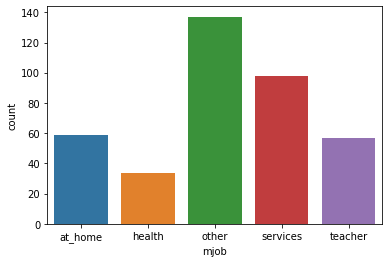

In [3427]:
sns.countplot(x = 'mjob', data = students)

In [3428]:
mjob = column_analysis('mjob')

NaN: 0 (0.0%)
other: 137 (35.6%)
services: 98 (25.5%)
at_home: 59 (15.3%)
teacher: 57 (14.8%)
health: 34 (8.8%)
Всего строк: 385


Кем работают матери учеников ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое):

- other: 137 (35.6%) - __наиболее часто встречающееся значение__
- services: 98 (25.5%)
- at_home: 59 (15.3%)
- teacher: 57 (14.8%)
- health: 34 (8.8%)

### __10. "fjob", строковая — работа отца__
('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [3429]:
fjob = column_analysis('fjob')

NaN: 36 (9.4%)
other: 190 (49.4%)
services: 100 (26.0%)
teacher: 29 (7.5%)
health: 15 (3.9%)
at_home: 15 (3.9%)
Всего строк: 385


In [3430]:
change_list = ['teacher', 'health', 'services', 'at_home', 'other']
fill_nan_randomly('fjob', change_list)  # Fill NaN Randomly

<AxesSubplot:xlabel='fjob', ylabel='count'>

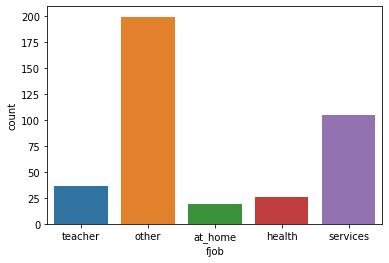

In [3431]:
sns.countplot(x = 'fjob', data = students)

In [3432]:
mjob = column_analysis('fjob')

NaN: 0 (0.0%)
other: 199 (51.7%)
services: 105 (27.3%)
teacher: 36 (9.4%)
health: 26 (6.8%)
at_home: 19 (4.9%)
Всего строк: 385


Кем работают отцы учеников ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое):

- other: 199 (51.7%) - __наиболее часто встречающееся значение__
- services: 105 (27.3%)
- teacher: 36 (9.4%)
- health: 26 (6.8%)
- at_home: 19 (4.9%)

### __11. "reason", строковая — причина выбора школы__
('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [3433]:
reason = column_analysis('reason')

NaN: 17 (4.4%)
course: 131 (34.0%)
home: 103 (26.8%)
reputation: 102 (26.5%)
other: 32 (8.3%)
Всего строк: 385


In [3434]:
change_list = ['home', 'reputation', 'course', 'other']
fill_nan_randomly('reason', change_list)  # Fill NaN Randomly

<AxesSubplot:xlabel='reason', ylabel='count'>

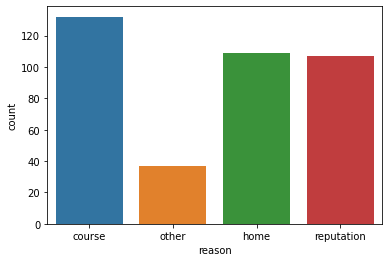

In [3435]:
sns.countplot(x = 'reason', data = students)

In [3436]:
reason = column_analysis('reason')

NaN: 0 (0.0%)
course: 132 (34.3%)
home: 109 (28.3%)
reputation: 107 (27.8%)
other: 37 (9.6%)
Всего строк: 385


Причины выборы школы учениками:

- course: 132 (34.3%) - образовательная программа;
- home: 109 (28.3%) - близость к дому;
- reputation: 107 (27.8%) - репутация школы;
- other: 37 (9.6%) - другое.

Видно, что в 90% случаев причина одна из трёх - программа, близость к дому или репутация школы.

### __12. "guardian", строковая — опекун__
('mother' - мать, 'father' - отец, 'other' - другое)

In [3437]:
guardian = column_analysis('guardian')

NaN: 28 (7.3%)
mother: 246 (63.9%)
father: 85 (22.1%)
other: 26 (6.8%)
Всего строк: 385


<AxesSubplot:xlabel='guardian', ylabel='count'>

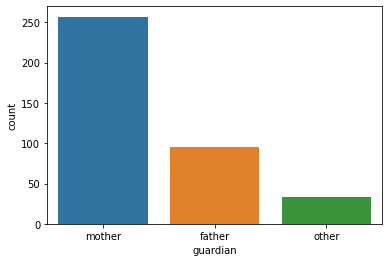

In [3438]:
change_list = ['mother', 'father', 'other']
fill_nan_randomly('guardian', change_list)  # Fill NaN Randomly

sns.countplot(x = 'guardian', data = students)

In [3439]:
guardian = column_analysis('guardian')

NaN: 0 (0.0%)
mother: 257 (66.8%)
father: 95 (24.7%)
other: 33 (8.6%)
Всего строк: 385


Распределение опекунства:

- mother: 257 (66.8%);
- father: 95 (24.7%);
- other: 33 (8.6%).

### __13. "traveltime", float - время в пути до школы__
(время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [3440]:
traveltime = column_analysis('traveltime')

NaN: 28 (7.3%)
1.0: 236 (61.3%)
2.0: 92 (23.9%)
3.0: 22 (5.7%)
4.0: 7 (1.8%)
Всего строк: 385


In [3441]:
change_list = ['1.0','2.0', '3.0','4.0']
fill_nan_randomly('traveltime', change_list)  # Fill NaN Randomly

# Change fedu column from string to integer in [0, 4]
students['traveltime'] = students['traveltime'].apply(lambda x: int(float(x)))

<AxesSubplot:xlabel='traveltime', ylabel='count'>

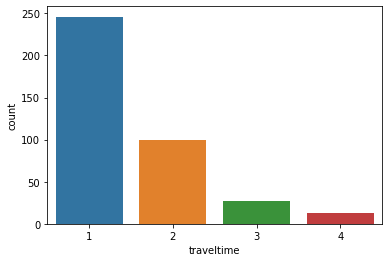

In [3442]:
sns.countplot(x = 'traveltime', data = students)

In [3443]:
traveltims = column_analysis('traveltime')
students['traveltime'] = students['traveltime'].apply(lambda x: int(float(x)))

NaN: 0 (0.0%)
1: 246 (63.9%)
2: 99 (25.7%)
3: 27 (7.0%)
4: 13 (3.4%)
Всего строк: 385


Отчетливо видна тенденция жить ближе к школе:

- 1: 246 (63.9%) - <15 минут
- 2: 99 (25.7%) - 15-30 минут
- 3: 27 (7.0%) - 30-60 минут
- 4: 13 (3.4%) - >60 минут

Более 90% учеников тратят на дорогу до школы не более 30 минут, а пости 2/3 учеников менее 15.

### __14. "studytime", float - время на учёбу помимо школы в неделю__
(1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [3444]:
studytime = column_analysis('studytime')

NaN: 7 (1.8%)
2.0: 191 (49.6%)
1.0: 99 (25.7%)
3.0: 62 (16.1%)
4.0: 26 (6.8%)
Всего строк: 385


<AxesSubplot:xlabel='studytime', ylabel='count'>

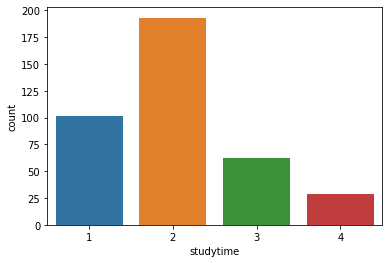

In [3445]:
change_list = ['1.0','2.0', '3.0','4.0']
fill_nan_randomly('studytime', change_list)  # Fill NaN Randomly

# Change fedu column from string to integer in [0, 4]
students['studytime'] = students['studytime'].apply(lambda x: int(float(x)))

sns.countplot(x = 'studytime', data = students)

In [3446]:
studytime = column_analysis('studytime')
students['studytime'] = students['studytime'].apply(lambda x: int(float(x)))

NaN: 0 (0.0%)
2: 193 (50.1%)
1: 101 (26.2%)
3: 62 (16.1%)
4: 29 (7.5%)
Всего строк: 385


Распределение учеников по времени занятий вне школы:

- 2: 193 (50.1%)
- 1: 101 (26.2%)
- 3: 62 (16.1%)
- 4: 29 (7.5%)

Большинство - 193 (50.1%) - занимается дополнительно 2-5 часов в неделю. Около 101 (26.2%) занимаются менее 2 часов.

Более настойчивые учатся дополнительно 5-10 часов в неделю - 62 (16.1%).

29 (7.5%) - Настоящие ботаники и нерды учатся почти непрерывно, более 10 часов в неделю помимо школы.

### __15. "failures", float - количество внеучебных неудач__
(n, если 1<=n<=3, иначе 0)

In [3447]:
x = column_analysis('failures')

NaN: 21 (5.5%)
0.0: 289 (75.1%)
1.0: 49 (12.7%)
2.0: 14 (3.6%)
3.0: 12 (3.1%)
Всего строк: 385


<AxesSubplot:xlabel='failures', ylabel='count'>

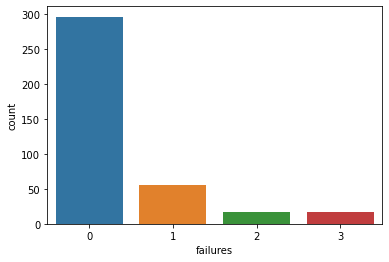

In [3448]:
change_list = ['0.0', '1.0','2.0', '3.0']
fill_nan_randomly('failures', change_list)  # Fill NaN Randomly

# Change column from string to integer
students['failures'] = students['failures'].apply(lambda x: int(float(x)))

sns.countplot(x = 'failures', data = students)

In [3449]:
x = column_analysis('failures')

# Change column from string to integer
students['failures'] = students['failures'].apply(lambda x: int(float(x)))

NaN: 0 (0.0%)
0: 296 (76.9%)
1: 55 (14.3%)
2: 17 (4.4%)
3: 17 (4.4%)
Всего строк: 385


У большинства учеников 296 (76.9%) нулевое количество внеучебных неудач.

Пропусков нет, __ура!__

### __16. "schoolsup", строковая - дополнительная образовательная поддержка__
(yes или no)

In [3450]:
x = column_analysis('schoolsup')

NaN: 8 (2.1%)
no: 326 (84.7%)
yes: 51 (13.2%)
Всего строк: 385


<AxesSubplot:xlabel='schoolsup', ylabel='count'>

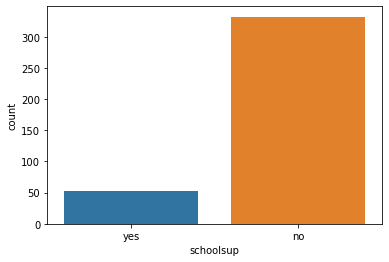

In [3451]:
change_list = ['yes', 'no']
fill_nan_randomly('schoolsup', change_list)  # Fill NaN Randomly

sns.countplot(x = 'schoolsup', data = students)

In [3452]:
x = column_analysis('schoolsup')

NaN: 0 (0.0%)
no: 332 (86.2%)
yes: 53 (13.8%)
Всего строк: 385


Большинство учеников, 332 (86.2%), не имеют дополнительной образовательной поддержки.

### 17. "famsup", строковая - семейная образовательная поддержка
### 18. "paid", строковая - дополнительные платные занятия по математике
### 19. "activities", строковая - дополнительные внеучебные занятия
### 20. "nursery", строковая - посещал детский сад
### 21. "higher", строковая - хочет получить высшее образование
### 22. "internet", строковая - наличие интернета дома
### 23. "romantic", строковая - в романтических отношениях
Везде выше - (yes или no)

Слегка автоматизируем процесс первичного анализа строковых данных.

In [3453]:
# Make list of columns
analyse_this = ['famsup', 'paid', 'activities', 'nursery', 
                'higher', 'internet', 'romantic']

In [3454]:
change_list = ['yes', 'no']

for col in analyse_this:
    print(col)
    column_analysis(col)
    fill_nan_randomly(col, change_list)  # Fill NaN Randomly
    print('')

famsup
NaN: 38 (9.9%)
yes: 216 (56.1%)
no: 131 (34.0%)
Всего строк: 385

paid
NaN: 40 (10.4%)
no: 194 (50.4%)
yes: 151 (39.2%)
Всего строк: 385

activities
NaN: 14 (3.6%)
yes: 192 (49.9%)
no: 179 (46.5%)
Всего строк: 385

nursery
NaN: 15 (3.9%)
yes: 295 (76.6%)
no: 75 (19.5%)
Всего строк: 385

higher
NaN: 17 (4.4%)
yes: 351 (91.2%)
no: 17 (4.4%)
Всего строк: 385

internet
NaN: 34 (8.8%)
yes: 299 (77.7%)
no: 52 (13.5%)
Всего строк: 385

romantic
NaN: 31 (8.1%)
no: 233 (60.5%)
yes: 121 (31.4%)
Всего строк: 385



Видим распределения выше. Не вполне понимаю, что нам это дает. Но мы хотя бы пропуски заполнили.

Стоит отметить, что большинство, 300 (77.9%) посещали детский сад.

Также большинство, 358 (93.0%), хотят получить высшее образование. Возможно обе школы, которые мы рассматриваем, "заточены" на подготовку в ВУЗ.

Большая часть учеников, 317 (82.3%), имеют доступ в интернет.

### 24. "famrel", float - семейные отношения
(от 1 - очень плохо до 5 - очень хорошо)

### 25. "freetime", float - свободное время после школы
(от 1 - очень мало до 5 - очень много)

### 26. "goout", float - проведение времени с друзьями
(от 1 - очень мало до 5 - очень много)

### 27. "health", float - текущее состояние здоровья
(от 1 - очень плохо до 5 - очень хорошо)

Слегка автоматизируем процесс первичного анализа числовых данных :-)

In [3455]:
# Make list of columns
analyse_this = ['famrel', 'freetime', 'goout', 'health']

In [3456]:
change_list = ['0.0', '1.0', '2.0', '3.0', '4.0']

for col in analyse_this:
    print(col)
    column_analysis(col)
    fill_nan_randomly(col, change_list)  # Fill NaN Randomly
    
    # Change column from string to integer
    students[col] = students[col].apply(lambda x: int(float(x)))
    print('')

famrel
NaN: 27 (7.0%)
4.0: 180 (46.8%)
5.0: 94 (24.4%)
3.0: 59 (15.3%)
2.0: 17 (4.4%)
1.0: 7 (1.8%)
-1.0: 1 (0.3%)
Всего строк: 385

freetime
NaN: 11 (2.9%)
3.0: 150 (39.0%)
4.0: 108 (28.1%)
2.0: 63 (16.4%)
5.0: 35 (9.1%)
1.0: 18 (4.7%)
Всего строк: 385

goout
NaN: 8 (2.1%)
3.0: 122 (31.7%)
2.0: 98 (25.5%)
4.0: 83 (21.6%)
5.0: 51 (13.2%)
1.0: 23 (6.0%)
Всего строк: 385

health
NaN: 15 (3.9%)
5.0: 135 (35.1%)
3.0: 86 (22.3%)
4.0: 62 (16.1%)
1.0: 45 (11.7%)
2.0: 42 (10.9%)
Всего строк: 385



Видно, что во всех колонках присутствуют значени 0, которых не должно быть по описанию, посокльку все шкалы размечены от 1 до 5.

Кроме того, в колонке 'famrel' присутствует значение -1, что также является] ошибкой.

Заменим для начала -1 на 1.

In [3457]:
students.famrel = students.famrel.replace(-1, 1)

С нулями предлагаю поступить так - заменить на моду в каждом столбце.

In [3458]:
students.famrel = students.famrel.replace(0, 4)
students.freetime = students.freetime.replace(0, 3)
students.goout = students.goout.replace(0, 3)
students.health = students.health.replace(0, 5)

In [3459]:
change_list = ['0.0', '1.0', '2.0', '3.0', '4.0']

for col in analyse_this:
    print(col)
    column_analysis(col)
    fill_nan_randomly(col, change_list)  # Fill NaN Randomly
    
    # Change column from string to integer
    students[col] = students[col].apply(lambda x: int(float(x)))
    print('')

famrel
NaN: 0 (0.0%)
4: 192 (49.9%)
5: 94 (24.4%)
3: 62 (16.1%)
2: 21 (5.5%)
1: 16 (4.2%)
Всего строк: 385

freetime
NaN: 0 (0.0%)
3: 155 (40.3%)
4: 111 (28.8%)
2: 63 (16.4%)
5: 35 (9.1%)
1: 21 (5.5%)
Всего строк: 385

goout
NaN: 0 (0.0%)
3: 127 (33.0%)
2: 98 (25.5%)
4: 84 (21.8%)
5: 51 (13.2%)
1: 25 (6.5%)
Всего строк: 385

health
NaN: 0 (0.0%)
5: 138 (35.8%)
3: 88 (22.9%)
4: 67 (17.4%)
1: 48 (12.5%)
2: 44 (11.4%)
Всего строк: 385



Для наглядности обратим теперь внимание на гистограммы.

<AxesSubplot:xlabel='famrel', ylabel='count'>

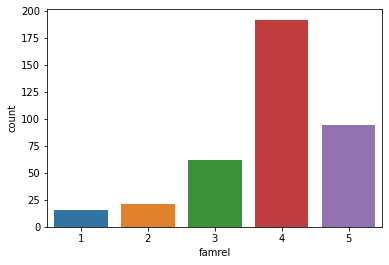

In [3460]:
sns.countplot(x = 'famrel', data = students)

<AxesSubplot:xlabel='freetime', ylabel='count'>

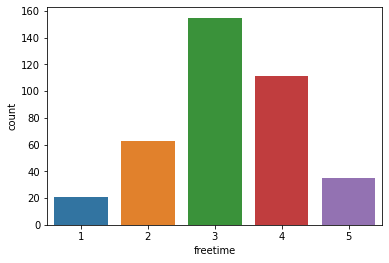

In [3461]:
sns.countplot(x = 'freetime', data = students)

<AxesSubplot:xlabel='goout', ylabel='count'>

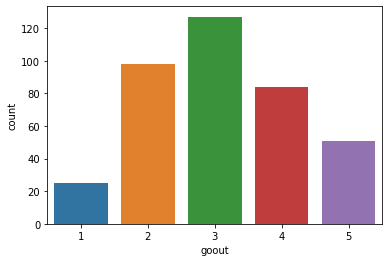

In [3462]:
sns.countplot(x = 'goout', data = students)

<AxesSubplot:xlabel='health', ylabel='count'>

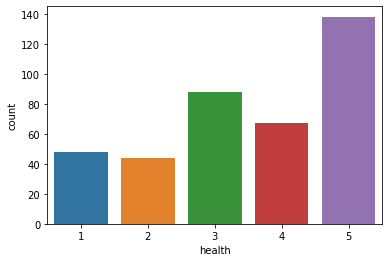

In [3463]:
sns.countplot(x = 'health', data = students)

In [3464]:
# sns.pairplot(students)

### 28. "absences", float - количество пропущенных занятий

In [3465]:
students.absences.describe()

count    373.000000
mean       6.812332
std       21.252632
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

In [3466]:
# Delete one students with 385 missed lessons
students = students[students.absences != students.absences.max()]

In [3467]:
change_list = ['0.0', '2.0', '4.0', '6.0', '8.0', '10.0'] # Most freauent values
fill_nan_randomly('absences', change_list)  # Fill NaN Randomly

In [3468]:
x = column_analysis('absences')

# Change column from string to integer
students['absences'] = students['absences'].apply(lambda x: int(float(x)))

NaN: 0 (0.0%)
0.0: 111 (28.9%)
2.0: 60 (15.6%)
4.0: 52 (13.5%)
6.0: 33 (8.6%)
8.0: 22 (5.7%)
10.0: 20 (5.2%)
12.0: 12 (3.1%)
14.0: 12 (3.1%)
3.0: 7 (1.8%)
7.0: 6 (1.6%)
16.0: 6 (1.6%)
18.0: 5 (1.3%)
5.0: 5 (1.3%)
20.0: 4 (1.0%)
1.0: 3 (0.8%)
9.0: 3 (0.8%)
22.0: 3 (0.8%)
13.0: 2 (0.5%)
15.0: 2 (0.5%)
11.0: 2 (0.5%)
24.0: 1 (0.3%)
21.0: 1 (0.3%)
38.0: 1 (0.3%)
23.0: 1 (0.3%)
26.0: 1 (0.3%)
75.0: 1 (0.3%)
17.0: 1 (0.3%)
56.0: 1 (0.3%)
54.0: 1 (0.3%)
40.0: 1 (0.3%)
19.0: 1 (0.3%)
30.0: 1 (0.3%)
25.0: 1 (0.3%)
28.0: 1 (0.3%)
Всего строк: 384


<AxesSubplot:xlabel='absences', ylabel='Density'>

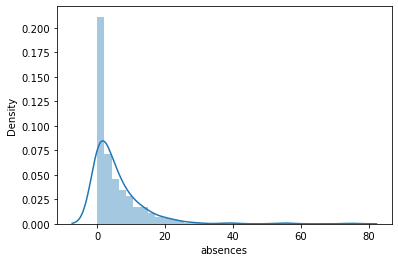

In [3469]:
sns.distplot(students['absences'])

<AxesSubplot:xlabel='absences', ylabel='count'>

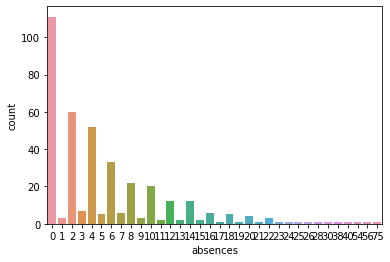

In [3470]:
sns.countplot(x = 'absences', data = students)

Интересно, что существенно чаще пропускают чётное количество занятий. Возможно причина в том, что занятия сдвоенные, по приципу "пары", и в связи с этим чаще пропускают полную "пару". Можно попробовать для упрощения восприятия округлить все неплоные пары до полных.

In [3471]:
students['absences'] = students['absences'].apply(lambda x: x+1 if x%2 else x)

<AxesSubplot:xlabel='absences', ylabel='count'>

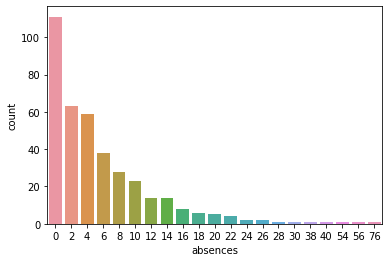

In [3472]:
sns.countplot(x = 'absences', data = students)

На первый взгляд, здесь все понятно - большее количество пропусков встречается реже.

### 29. "score", float - баллы по госэкзамену по математике

In [3473]:
students.score.describe()

count    378.000000
mean      51.944444
std       22.940115
min        0.000000
25%       40.000000
50%       55.000000
75%       65.000000
max      100.000000
Name: score, dtype: float64

Судя по всему, госэкзамен оценивается по 100-бальной шкале.

In [3474]:
len(students[students.score == students.score.min()])

37

У нас есть 37 студентов, которые сдали госэкзамен на 0 баллов, то есть по-видимому его просто не сдавали.

Предлагаю их удалить из нашего датасета. Поскольку во-первых, мы всё-таки изучаем  влияние условий жизни учащихся на их успеваемость, а если мы не знаем их успеваемости, то что изучать?

Во-вторых, заполнять случайными оценками в данном конкретном случае интуитивно представляется не корректным.

И в-третьих, студентов с нулевым результатом менее 10%.

Поэтому удаляем.

In [3475]:
students = students[students.score != 0]
students

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,LE3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,-6.0,yes,no,no,4,3,4,3,6,30.0
1,GP,F,17,U,GT3,A,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,-6.0,yes,yes,no,5,3,3,3,4,30.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,no,no,yes,-6.0,yes,yes,no,4,3,2,3,10,50.0
3,GP,F,15,U,GT3,T,4,2,health,at_home,home,mother,1,3,0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3,2,2,5,2,75.0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,-6.0,yes,no,no,4,3,2,5,4,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,MS,F,18,R,GT3,T,4,4,teacher,at_home,reputation,mother,3,1,0,no,yes,yes,yes,yes,-3.0,yes,yes,yes,4,4,3,5,8,30.0
388,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,yes,no,yes,-6.0,yes,yes,no,4,3,4,1,0,40.0
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,-3.0,yes,yes,no,2,4,5,2,4,80.0
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,-3.0,yes,yes,no,4,4,1,5,0,50.0


Пропусков у нас больше нет, и это замечательно.

<AxesSubplot:xlabel='score', ylabel='Density'>

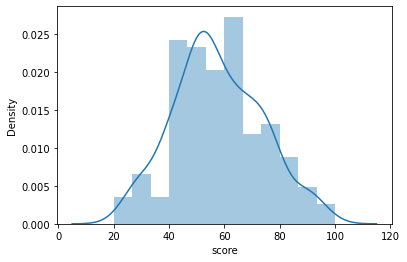

In [3476]:
sns.distplot(students['score'])

In [3477]:
students.score.describe()

count    341.000000
mean      57.580645
std       16.063205
min       20.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

- Средний балл - 57.6
- Стандартное отклонение - 16.1

- Минимум - 20
- Q1 - 45
- Q2 (медиана) - 55
- Q3 - 70
- Максимум - 100

### 30. "studytime, granular", float - недокументированный столбец

In [3478]:
students.granular.describe()

count    340.000000
mean      -6.150000
std        2.493265
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: granular, dtype: float64

<AxesSubplot:xlabel='granular', ylabel='Density'>

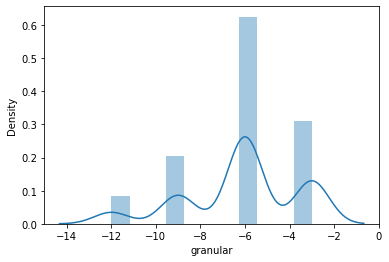

In [3479]:
sns.distplot(students['granular'])

In [3480]:
x = column_analysis('granular')

NaN: 7 (2.0%)
-6.0: 174 (50.1%)
-3.0: 86 (24.8%)
-9.0: 57 (16.4%)
-12.0: 23 (6.6%)
Всего строк: 347


In [3481]:
change_list = ['-3.0', '-6.0','-9.0', '-12.0']
fill_nan_randomly('granular', change_list)  # Fill NaN Randomly

In [3482]:
students['granular'] = students['granular'].apply(lambda x: int(float(x)))

In [3483]:
students.granular.describe()

count    347.000000
mean      -6.181556
std        2.538468
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: granular, dtype: float64

<AxesSubplot:xlabel='granular', ylabel='Density'>

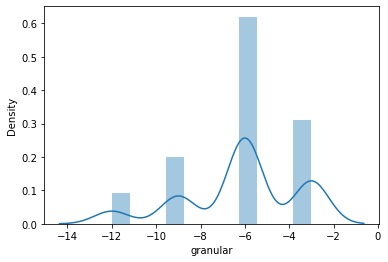

In [3484]:
sns.distplot(students['granular'])

## Анализ категориальных признаков

<AxesSubplot:xlabel='school', ylabel='score'>

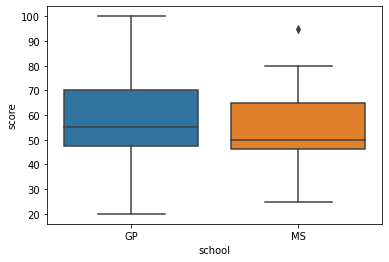

In [3485]:
sns.boxplot(x = 'school', y = 'score', data = students)

В школе GP уровень подготовки выше. В школе MS имеется один выброс.

<AxesSubplot:xlabel='sex', ylabel='score'>

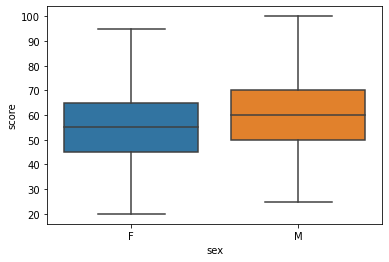

In [3486]:
sns.boxplot(x = 'sex', y = 'score', data = students)

Молодые люди успевают по математике в среднем лучше девушек.

<AxesSubplot:xlabel='age', ylabel='score'>

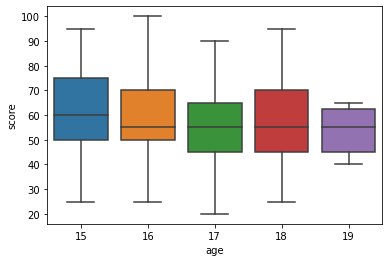

In [3487]:
sns.boxplot(x = 'age', y = 'score', data = students)

15-летние успевают немного лучше других возрастов. У возрастов от 26 до 19 примерно одинаковый средний уровень оценок.

<AxesSubplot:xlabel='address', ylabel='score'>

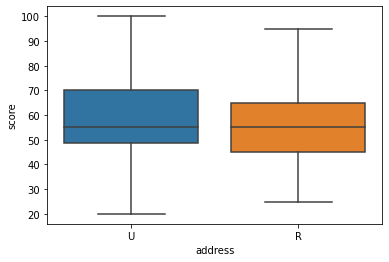

In [3488]:
sns.boxplot(x = 'address', y = 'score', data = students)

Средние оценки примерно одинаковы для городских и сельских жителей. У городских наблюдается чуть большие Q1 и Q3.

<AxesSubplot:xlabel='famsize', ylabel='score'>

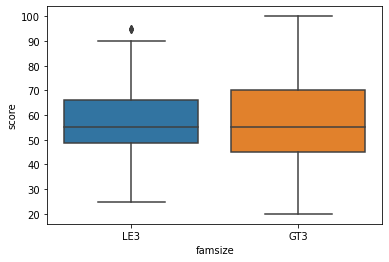

In [3489]:
sns.boxplot(x = 'famsize', y = 'score', data = students)

Средние оценки примерно равны. В семьях с более чем 3 членами имеет место больший разброс оценок. В малодетных семьях есть один выброс.

<AxesSubplot:xlabel='pstatus', ylabel='score'>

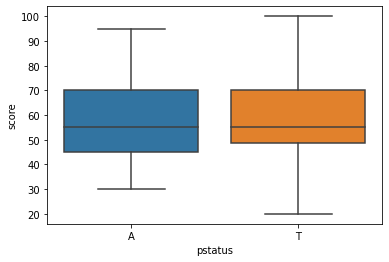

In [3490]:
sns.boxplot(x = 'pstatus', y = 'score', data = students)

<AxesSubplot:xlabel='medu', ylabel='score'>

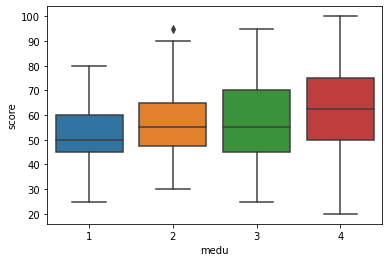

In [3491]:
sns.boxplot(x = 'medu', y = 'score', data = students)

<AxesSubplot:xlabel='fedu', ylabel='score'>

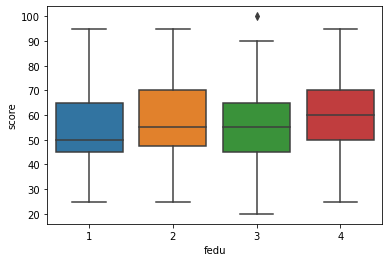

In [3492]:
sns.boxplot(x = 'fedu', y = 'score', data = students)

Успеваемость студентов тем выше, чем выше уровень образования родителей.

<AxesSubplot:xlabel='mjob', ylabel='score'>

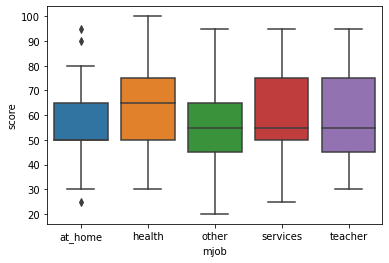

In [3493]:
sns.boxplot(x = 'mjob', y = 'score', data = students)

<AxesSubplot:xlabel='fjob', ylabel='score'>

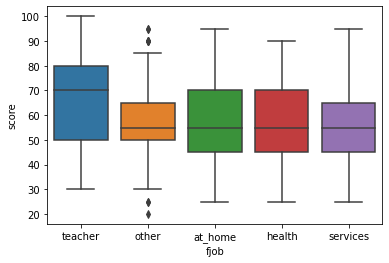

In [3494]:
sns.boxplot(x = 'fjob', y = 'score', data = students)

Примечательно, что лучше успевают студенты у которых:

- либо мать работает в сфере здравоохранения;
- либо отец работает учителем.

<AxesSubplot:xlabel='reason', ylabel='score'>

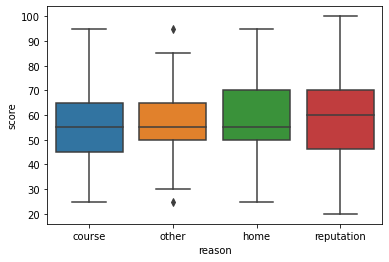

In [3495]:
sns.boxplot(x = 'reason', y = 'score', data = students)

Лучшие средние оценки показывают студенты, выбравшие школу по причине её репутации.

<AxesSubplot:xlabel='guardian', ylabel='score'>

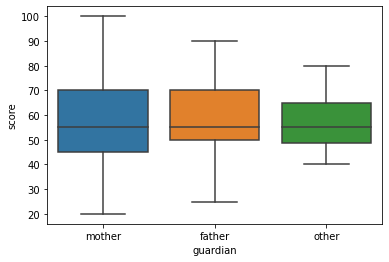

In [3496]:
sns.boxplot(x = 'guardian', y = 'score', data = students)

Разницы между средними оценками в зависимости от опекуна не наблюдается.

<AxesSubplot:xlabel='traveltime', ylabel='score'>

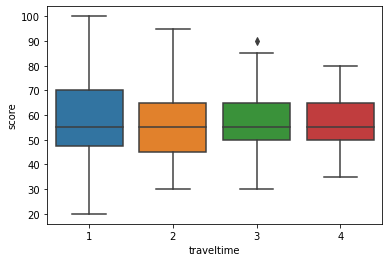

In [3497]:
sns.boxplot(x = 'traveltime', y = 'score', data = students)

Разницы между средними оценками в зависимости от времени в пути до школы не наблюдается.

<AxesSubplot:xlabel='studytime', ylabel='score'>

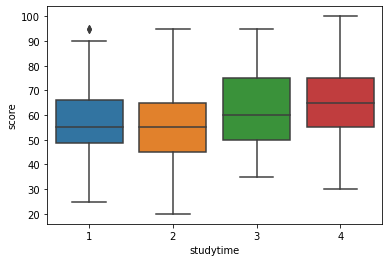

In [3498]:
sns.boxplot(x = 'studytime', y = 'score', data = students)

Наблюдается прямая зависимость между временем на учёбу помимо школы в неделю и успеваемостью.

<AxesSubplot:xlabel='failures', ylabel='score'>

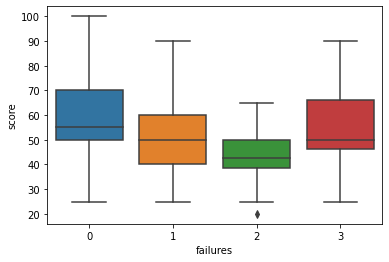

In [3499]:
sns.boxplot(x = 'failures', y = 'score', data = students)

Вполне ожидаемо, что студенты с небольшим количеством внеучебных неудач успевают лучше. Любопытно относительно высокая успеваемость студентов с 3 неудачами. Возможно они уже заказались, претерпев тяготы и невзгоды, и теперь справляются лучше.

<AxesSubplot:xlabel='schoolsup', ylabel='score'>

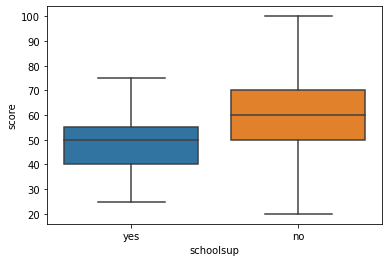

In [3500]:
sns.boxplot(x = 'schoolsup', y = 'score', data = students)

Чем больше дополнительная образовательная поддержка в школе, тем ниже успеваемость. Странно, поскольку выглядит как "не в коня корм".

<AxesSubplot:xlabel='famsup', ylabel='score'>

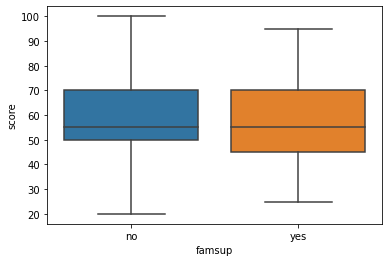

In [3501]:
sns.boxplot(x = 'famsup', y = 'score', data = students)

Cемейная образовательная поддержка практически не оказывает влияния на средний уровень оценок.

<AxesSubplot:xlabel='paid', ylabel='score'>

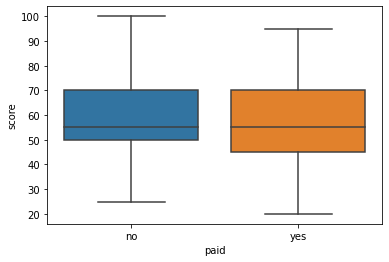

In [3502]:
sns.boxplot(x = 'paid', y = 'score', data = students)

Дополнительные платные занятия по математике также практически не оказывают влияния на средний уровень оценок.

<AxesSubplot:xlabel='activities', ylabel='score'>

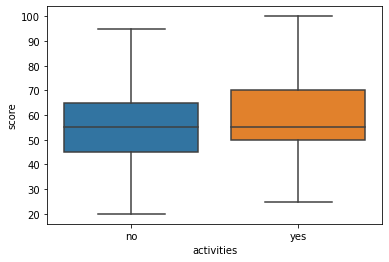

In [3503]:
sns.boxplot(x = 'activities', y = 'score', data = students)

Дополнительные внеучебные занятия слабо влияют на на средний уровень оценок.

<AxesSubplot:xlabel='nursery', ylabel='score'>

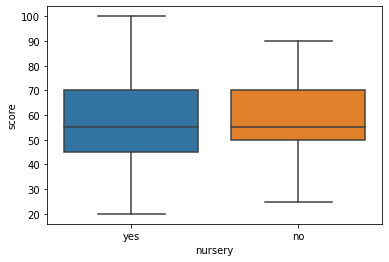

In [3504]:
sns.boxplot(x = 'nursery', y = 'score', data = students)

Факт посещения детского сада не играет роли.

<AxesSubplot:xlabel='higher', ylabel='score'>

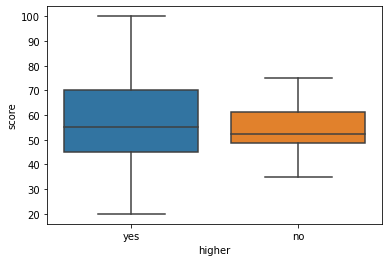

In [3505]:
sns.boxplot(x = 'higher', y = 'score', data = students)

Оказывает небольшое влияние на средний уровень оценок.

<AxesSubplot:xlabel='internet', ylabel='score'>

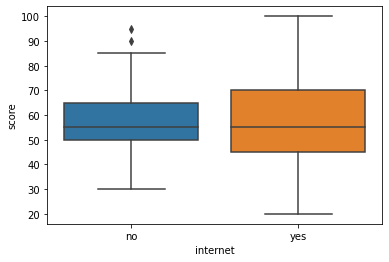

In [3506]:
sns.boxplot(x = 'internet', y = 'score', data = students)

Наличие интернета практически не влияет на успеваемость.

<AxesSubplot:xlabel='romantic', ylabel='score'>

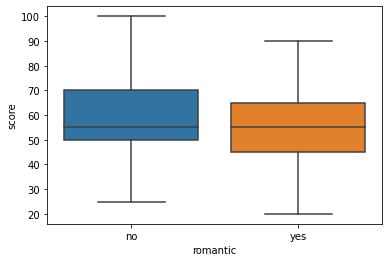

In [3507]:
sns.boxplot(x = 'romantic', y = 'score', data = students)

Романтические отношения слабо влюяют на средние оценки.

<AxesSubplot:xlabel='famrel', ylabel='score'>

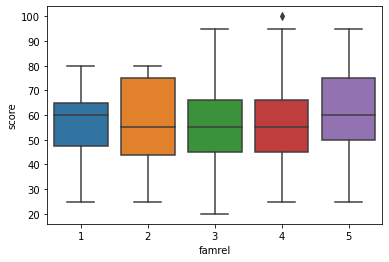

In [3508]:
sns.boxplot(x = 'famrel', y = 'score', data = students)

Более высокими оценками выделяются ученики из семей либо с очень хорошими отношениями, либо с очень плохими.

<AxesSubplot:xlabel='freetime', ylabel='score'>

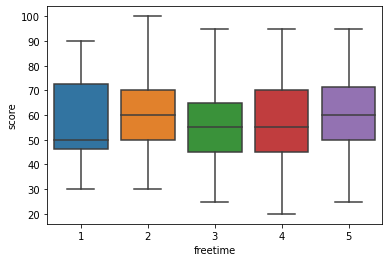

In [3509]:
sns.boxplot(x = 'freetime', y = 'score', data = students)

Студенты имеющие очень мало свободного времени после школы успевают заметно хуже остальных. Но таких немного, поэтому предлагаю исключить.

<AxesSubplot:xlabel='goout', ylabel='score'>

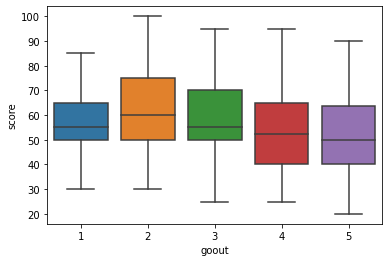

In [3510]:
sns.boxplot(x = 'goout', y = 'score', data = students)

Лучшую успеваеомсть показывают студенты, проводящие очень мало, мало и среднее количество времени с друзьями.

Те же, кто проводят с друзьями много и очень много времени, учатся заметно хуже.

<AxesSubplot:xlabel='health', ylabel='score'>

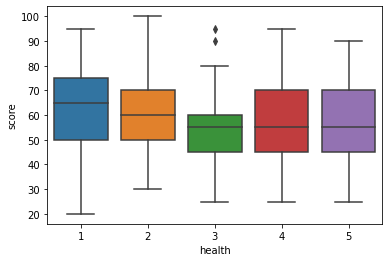

In [3511]:
sns.boxplot(x = 'health', y = 'score', data = students)

Странно, но студенты с плохим и очень плохим здоровьем успевают лучше остальных. Возможно потому, что мало проводят времени с друзьями.

<AxesSubplot:xlabel='absences', ylabel='score'>

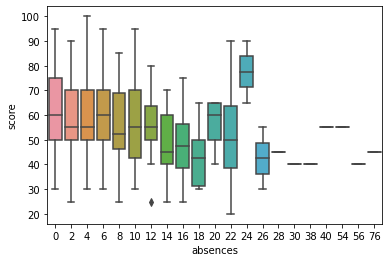

In [3512]:
sns.boxplot(x = 'absences', y = 'score', data = students)

Для студентов пропустивших 12 и менее занятий, не наблюдается существенной свзяи успеваемости от количества пропусков.

Для пропустивших более 12 занятий, наблюдается снижение средней успеваемости. 

<AxesSubplot:xlabel='granular', ylabel='score'>

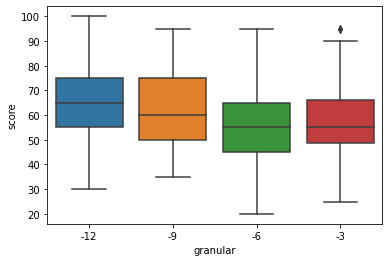

In [3513]:
sns.boxplot(x = 'granular', y = 'score', data = students)

 Чем ниже недокументированный показатель granular, тем выше успеваемость, то есть имеется обратная зависимость.
 
 Выскажу предположение, что показатель оценивает регулярность занятий студента. Чем более регулярно студент занимается, тем меньше показатель granular, и тем выше средние оценки.

## Вывод относительно числовых столбцов для модели построения модели

Предлагается оставить для построения подели следующие количественные переменные:
- age - возраст студента;
- medu/fedu - образование родителей;
- studytime — время на учёбу помимо школы в неделю;
- failures — количество внеучебных неудач;
- granular;
- health - текущее состояние здоровья;
- goout - проведение времени с друзьями.

Следующие количественные переменные предлагается удалить из рассмотрения:
- traveltime (время в пути до школы) - поскольку на графике не просматривается зависимость;
- famrel (семейные отношения) - на графике просматривается зависимость только в случае крайних и немногочисленных значений;
- freetime (свободное время после школы) - отличия в успеваемости есть только в небольшой группе;
- absences (количество пропущенных занятий) - слабая зависимость для большинства студентов.







### Корреляционный анализ

In [3514]:
students_for_model = students.loc[:, ['age', 'medu', 'fedu', 'studytime', 
                                      'failures', 'granular', 'health', 'goout',
                                      'score']]
students_for_model

,age,medu,fedu,studytime,failures,granular,health,goout,score
0,18,4,4,2,0,-6,3,4,30.0
1,17,1,1,2,0,-6,3,3,30.0
2,15,1,1,2,3,-6,3,2,50.0
3,15,4,2,3,0,-9,5,2,75.0
4,16,3,3,2,0,-6,5,2,50.0
...,...,...,...,...,...,...,...,...,...
386,18,4,4,1,0,-3,5,3,30.0
388,18,3,1,2,0,-6,1,4,40.0
391,17,3,1,1,0,-3,2,5,80.0
393,18,3,2,1,0,-3,5,1,50.0


In [3515]:
# sns.pairplot(students_for_model, kind = 'reg')

In [3516]:
# students_for_model.corr()

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок студентов по различным параметрам неразличимы:

In [3517]:
# list_of_columns = ['address', 'famsize', 'pstatus', 'mjob', 'pjob', 
#                    'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 
#                    'activities', 'nursery', 'higher', 'internet', 'romantic']

list_of_columns = ['mjob', 'fjob', 'reason', 'schoolsup']

for col in list_of_columns:
    get_stat_dif(col)

('other', 'services')
('other', 'teacher')
('other', 'at_home')
('other', 'health')
('services', 'teacher')
('services', 'at_home')
('services', 'health')
('teacher', 'at_home')
('teacher', 'health')
('at_home', 'health')
('other', 'services')
('other', 'teacher')
('other', 'health')
('other', 'at_home')
('services', 'teacher')
('services', 'health')
('services', 'at_home')
('teacher', 'health')
('teacher', 'at_home')
('health', 'at_home')
('course', 'reputation')
('course', 'home')
('course', 'other')
('reputation', 'home')
('reputation', 'other')
('home', 'other')
('no', 'yes')
